# **Heart Attack**

## **1. Import**

### 1.1. General Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics as metrics
from sklearn.model_selection import train_test_split 

## **2. Preparing Data**

### 2.1. Importing Data

In [2]:
df = pd.read_csv('heart.csv')
data = df.to_numpy()

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = data[:, :-1]
y = data[:, -1]

In [6]:
X.shape

(303, 13)

## **3. Model 1: Logistic Regression**

### **3.1. Without Regularization**

#### 3.1.1 Splitting Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=42)

#### 3.1.2. Processing Data

##### 3.1.2.1. Reshape

In [8]:
y_2d_train = y_train.reshape(-1,1)
y_2d_test = y_test.reshape(-1,1)

In [9]:
X_train.shape, y_2d_train.shape

((227, 13), (227, 1))

##### 3.1.2.2. Design Matrix

In [12]:
ones = np.ones((X_train.shape[0], 1))
X_train_1 = np.hstack((ones,X_train))
X_train_1

array([[ 1., 57.,  1., ...,  2.,  1.,  2.],
       [ 1., 59.,  1., ...,  1.,  1.,  1.],
       [ 1., 67.,  1., ...,  1.,  2.,  3.],
       ...,
       [ 1., 69.,  1., ...,  1.,  1.,  2.],
       [ 1., 46.,  1., ...,  2.,  0.,  3.],
       [ 1., 63.,  0., ...,  2.,  2.,  2.]])

In [13]:
X_train_1.shape

(227, 14)

##### 3.1.2.3. Initialize w

In [14]:
w_init = np.zeros((X_train_1.shape[1], 1))

In [15]:
w_init.shape

(14, 1)

#### 3.1.3. Sigmoid(z)

$$\sigma (z) = \frac{1}{1 + e^{-z}}$$

In [19]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### 3.1.4. Prediction Function

$$ h(x) = \frac{1}{1 + e^{-(w_0+w_1x_1+w_2x_2+...+w_dx_d)}} $$

$$ h(x) = \frac{1}{1 + e^{-Xw}} $$

In [21]:
def hypothesis(X, w):
    return sigmoid(np.dot(X, w))

In [22]:
y_hat_init = hypothesis(X_train_1, w_init)
y_hat_init.shape

(227, 1)

#### 3.1.5. Log_likelihood Function

$$ l(w) = \sum_{i=1}^{N} y^{(i)}ln(h(x^{(i)})) + (1 - y^{(i)})ln(1 - h(x^{(i)})) $$

In [24]:
def log_likelihood(X, y, w):
    y_hat = sigmoid(np.dot(X, w))
    return np.dot(y.T, np.log(1-y_hat)) + np.dot((1-y).T, np.log(y_hat))

y_2d_train.shape, hypothesis(X_train_1, w_init).shape

((227, 1), (227, 1))

In [25]:
log_likelihood(X_train_1, y_2d_train, w_init)

array([[-157.34440999]])

#### 3.1.6. Gradient Ascent

In [26]:
def gradient_ascent(X, y, alpha, num_iters):
    N = X.shape[0]
    w = np.zeros((X.shape[1], 1))

    for _ in range(num_iters):
        y_hat = hypothesis(X, w)
        w += alpha / N * np.dot(X.T, (y - y_hat))

    return w

In [27]:
alpha = 0.0000001
num_iters = 100000
w = gradient_ascent(X_train_1, y_2d_train, alpha, num_iters)
w

array([[-5.00914040e-05],
       [-7.98775123e-03],
       [-7.83859626e-04],
       [ 1.91000670e-03],
       [-8.89328914e-03],
       [-4.49283853e-03],
       [ 2.61810824e-05],
       [ 1.98628259e-04],
       [ 1.95544716e-02],
       [-8.97480944e-04],
       [-2.09286422e-03],
       [ 8.28181376e-04],
       [-1.73114451e-03],
       [-1.08836361e-03]])

#### 3.1.7. Predict the Class Label

In [29]:
def predict_class(X, w, t = 0.5):
    p = sigmoid(np.dot(X, w))
    
    p_class = np.zeros(p.shape)
    
    p_class[p >= t] = 1
    return p_class

#### 3.1.8. Test

In [32]:
ones = np.ones((X_test.shape[0], 1))
X_test_1 = np.hstack((ones, X_test))

In [33]:
y_hat = predict_class(X_test_1, w, 0.5)

#### 3.1.9. Scores

##### 3.1.9.1. Precision

In [34]:
def precision(y, y_hat):
    true_positive = np.sum(np.logical_and((y == 1), (y_hat == 1)))
    false_positive = np.sum(np.logical_and((y == 0), (y_hat == 1)))

    if true_positive + false_positive > 0:
        return true_positive / (true_positive + false_positive)
    return 0

In [35]:
prec = precision(y_2d_test, y_hat)
prec

0.723404255319149

##### 3.1.9.2. Recall

In [37]:
def recall(y, y_hat):
    true_positive = np.sum(np.logical_and((y == 1), (y_hat == 1)))
    false_negative = np.sum(np.logical_and((y == 1), (y_hat == 0)))

    if true_positive + false_negative > 0:
        return true_positive / (true_positive + false_negative)
    return 0

In [38]:
rec  = recall(y_2d_test, y_hat)
rec

0.8292682926829268

##### 3.1.9.3. F1

In [39]:
def f1(precision, recall):
    if precision + recall > 0:
        return 2 * (precision * recall) / (precision + recall)
    return 0

In [40]:
f = f1(prec, rec)
f

0.7727272727272727

##### 3.1.9.4. Confusion Matrix

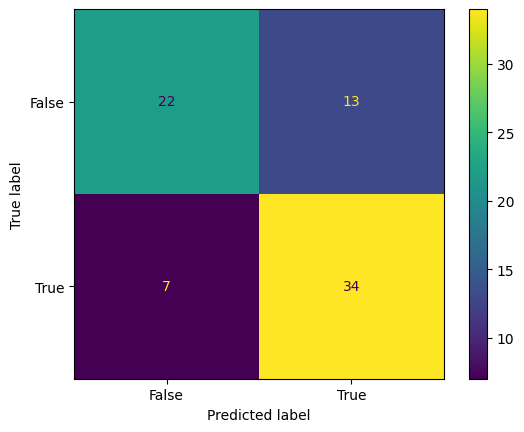

In [41]:
cm = metrics.confusion_matrix(y_2d_test, y_hat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
cm_display.plot()
plt.show()

### **3.2. Adding L1 Regularization**

### **3.3. Adding L2 Regularization**